In [270]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
import pandas_profiling as pp
from pandas_profiling import ProfileReport
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [180]:
#Q1
heart=pd.read_csv("heart.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [181]:
#X-Train and Y-Train
#heart.target = heart["target"]
#X = heart.drop("target",1)   #Feature Matrix
#y = heart["target"]          #Target Variable
#heart.head()

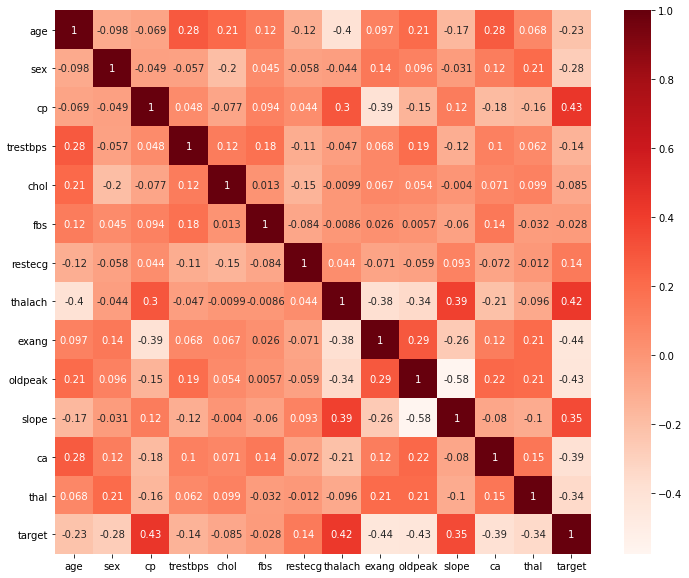

In [135]:
#Q2
#Using Pearson Correlation on the ins_filter dataframe
plt.figure(figsize=(12,10))
cor = heart.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [96]:
# scatter matrix
fig = ff.create_scatterplotmatrix(heart, diag='box', colormap='Portland',
                                  colormap_type='cat',
                                  height=1500, width=1500)
fig = go.Figure(fig)
fig.show()

In [184]:
#Data frame for continuous columns from the dataframe of X-features
heart_cont=heart.drop(["age","sex","fbs","cp", "restecg","exang", "slope","ca","thal","target"], axis=1)
heart_cont

,trestbps,chol,thalach,oldpeak
0,145,233,150,2.3
1,130,250,187,3.5
2,130,204,172,1.4
3,120,236,178,0.8
4,120,354,163,0.6
...,...,...,...,...
298,140,241,123,0.2
299,110,264,132,1.2
300,144,193,141,3.4
301,130,131,115,1.2


In [185]:
#Data frame for discrete columns from the dataframe of X-features
heart_discrete=heart.drop(["trestbps","chol","thalach","oldpeak"], axis=1)
heart_discrete

,age,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,63,1,3,1,0,0,0,0,1,1
1,37,1,2,0,1,0,0,0,2,1
2,41,0,1,0,0,0,2,0,2,1
3,56,1,1,0,1,0,2,0,2,1
4,57,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0,1,1,1,0,3,0
299,45,1,3,0,1,0,1,0,3,0
300,68,1,0,1,1,0,1,2,3,0
301,57,1,0,0,1,1,1,1,3,0


Text(0, 0.5, 'count')

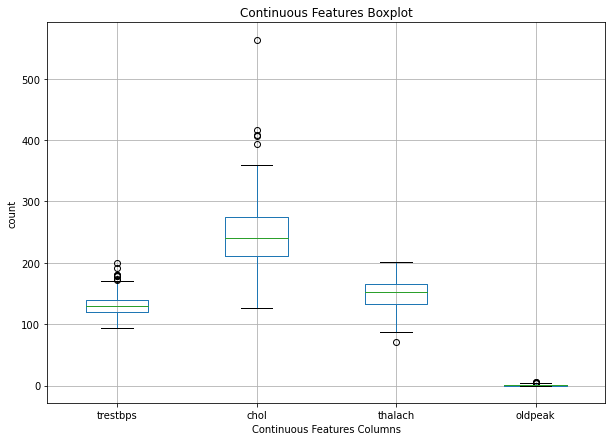

In [186]:
#Q3
# Visualization of outliers for Continuous columns or features
plt.figure(figsize = (10,7))
heart_cont.boxplot()
plt.title("Continuous Features Boxplot")
plt.xlabel('Continuous Features Columns')
plt.ylabel('count')

We have outliers on trestbps, chol, thalach, oldpeak features

Text(0, 0.5, 'Count')

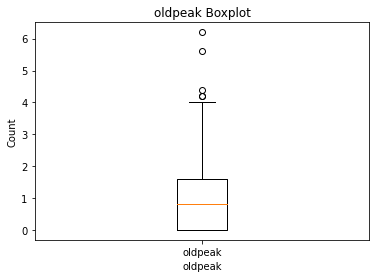

In [187]:
#Boxplot for oldpeak, showing outliers
plt.boxplot([heart_cont.oldpeak],labels=['oldpeak'])
plt.title("oldpeak Boxplot")
plt.xlabel('oldpeak')
plt.ylabel('Count')

There are outliers on all continuous features

In [188]:
#Resolving outliers using IQR technique
heart_cont.describe()

,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000
mean,131.623762,246.264026,149.646865,1.039604
std,17.538143,51.830751,22.905161,1.161075
min,94.000000,126.000000,71.000000,0.000000
25%,120.000000,211.000000,133.500000,0.000000
50%,130.000000,240.000000,153.000000,0.800000
75%,140.000000,274.500000,166.000000,1.600000
max,200.000000,564.000000,202.000000,6.200000


In [189]:
#IQR for trestbps
Q1_trestbps= heart_cont.trestbps.quantile(0.25)
Q3_trestbps= heart_cont.trestbps.quantile(0.75)
IQR_trestbps= Q3_trestbps - Q1_trestbps
IQR_trestbps




20.0

In [190]:
# Lower limit and Upper limit for trestbps
lower_limit_trestbps = Q1_trestbps - 1.5*IQR_trestbps
upper_limit_trestbps = Q3_trestbps +1.5*IQR_trestbps
lower_limit_trestbps, upper_limit_trestbps

(90.0, 170.0)

In [191]:
#IQR for chol
Q1_chol= heart_cont.chol.quantile(0.25)
Q3_chol= heart_cont.chol.quantile(0.75)
IQR_chol= Q3_chol - Q1_chol
IQR_chol

63.5

In [192]:
# Lower limit and Upper limit for chol
lower_limit_chol = Q1_chol - 1.5*IQR_chol
upper_limit_chol = Q3_chol +1.5*IQR_chol
lower_limit_chol, upper_limit_chol

(115.75, 369.75)

In [193]:
#IQR for thalach
Q1_thalach= heart_cont.thalach.quantile(0.25)
Q3_thalach= heart_cont.thalach.quantile(0.75)
IQR_thalach= Q3_thalach - Q1_thalach
IQR_thalach

32.5

In [194]:
# Lower limit and Upper limit for thalach
lower_limit_thalach = Q1_thalach - 1.5*IQR_thalach
upper_limit_thalach = Q3_thalach +1.5*IQR_thalach
lower_limit_thalach, upper_limit_thalach

(84.75, 214.75)

In [195]:
#IQR for oldpeak
Q1_oldpeak= heart_cont.oldpeak.quantile(0.25)
Q3_oldpeak= heart_cont.oldpeak.quantile(0.75)
IQR_oldpeak= Q3_oldpeak - Q1_oldpeak
IQR_oldpeak

1.6

In [196]:
# Lower limit and Upper limit for oldpeak
lower_limit_oldpeak = Q1_oldpeak - 1.5*IQR_oldpeak
upper_limit_oldpeak = Q3_oldpeak +1.5*IQR_oldpeak
lower_limit_oldpeak, upper_limit_oldpeak

(-2.4000000000000004, 4.0)

In [207]:
#New Dataframe with no outliers
heart_cont_no_outlier= heart_cont[(heart_cont.trestbps > 90) & (heart_cont.trestbps < 170)]
heart_cont_no_outlier= heart_cont[(heart_cont.chol > 115.75) & (heart_cont.chol < 369.75)]
heart_cont_no_outlier= heart_cont[(heart_cont.thalach > 84.75) & (heart_cont.thalach < 214.75)]
heart_cont_no_outlier= heart_cont[(heart_cont.oldpeak > -2.4000000000000004) & (heart_cont.oldpeak < 4.0)]
heart_cont_no_outlier

,trestbps,chol,thalach,oldpeak
0,145,233,150,2.3
1,130,250,187,3.5
2,130,204,172,1.4
3,120,236,178,0.8
4,120,354,163,0.6
...,...,...,...,...
298,140,241,123,0.2
299,110,264,132,1.2
300,144,193,141,3.4
301,130,131,115,1.2


In [198]:
#Q4
heart_cont_no_outlier.oldpeak.describe()


count    295.000000
mean       0.943729
std        1.009186
min        0.000000
25%        0.000000
50%        0.600000
75%        1.600000
max        3.800000
Name: oldpeak, dtype: float64

In [199]:
# Defining bins for oldpeak feature
bins=[-0.1 , 1.0 , 2.0, 3.0 , 4.0, 6.0, 7.0]

In [212]:
#Names for the 6 groups
group_names= ["level_1","level_2","level_3","level_4","level_5","level_6"]
heart_cont_no_outlier["oldpeak_Level"]=pd.cut(X["oldpeak"], bins, labels=group_names)
heart_cont_no_outlier

,trestbps,chol,thalach,oldpeak,oldpeak_Level
0,145,233,150,2.3,level_3
1,130,250,187,3.5,level_4
2,130,204,172,1.4,level_2
3,120,236,178,0.8,level_1
4,120,354,163,0.6,level_1
...,...,...,...,...,...
298,140,241,123,0.2,level_1
299,110,264,132,1.2,level_2
300,144,193,141,3.4,level_4
301,130,131,115,1.2,level_2


In [213]:
heart_cont_no_outlier["oldpeak_Level"].value_counts()


level_1    180
level_2     73
level_3     30
level_4     12
level_6      0
level_5      0
Name: oldpeak_Level, dtype: int64

In [214]:
#Q5
#Using Pearson Correlation for feature selection
#plt.figure(figsize=(12,10))
#cor = heart.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [215]:
#Correlation with output variable
#cor_target = abs(cor["target"])
#cor_target 

In [216]:
#Selecting highly correlated features
#relevant_features = cor_target[cor_target>0.5]
#relevant_features

In [217]:
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(heart)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const       9.196735e-01
age         4.976449e-29
sex         4.407444e-01
cp          3.890043e-01
trestbps    3.437234e-25
chol        6.777603e-01
fbs         5.280383e-01
restecg     3.040790e-01
thalach     7.786071e-01
exang       5.652548e-01
oldpeak     4.197802e-01
slope       8.262966e-01
ca          9.835127e-01
thal        6.897760e-01
target      0.000000e+00
dtype: float64

In [218]:
#Backward Elimination
cols = list(heart_cont.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['thalach', 'oldpeak']


Feature Selection results shows features thalach and oldpeak are the important features with te model

In [223]:
#Q6
#Slice the data scale the selected features
#Slicing data
# Create X (all the feature columns)
X = heart_cont_no_outlier.drop(["trestbps","chol","oldpeak_Level"], axis =1)
X

,thalach,oldpeak
0,150,2.3
1,187,3.5
2,172,1.4
3,178,0.8
4,163,0.6
...,...,...
298,123,0.2
299,132,1.2
300,141,3.4
301,115,1.2


In [224]:
# Create y (the target column)
y = heart.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

C:\Users\NYONIC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='thalach'>

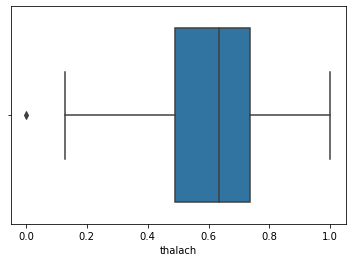

In [238]:
sns.boxplot(X.thalach)

C:\Users\NYONIC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='oldpeak'>

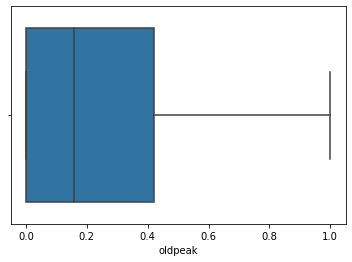

In [239]:
sns.boxplot(X.oldpeak)

In [241]:
#Q7
# check if balanced data set 
y.head(), y.value_counts()


(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 1    165
 0    138
 Name: target, dtype: int64)

In [266]:
chi2_check = []
for i in X.columns:
    if chi2_contingency(pd.crosstab(heart['target'], heart[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [X.columns, chi2_check]).T 
res.columns = ['Column', 'Hypothesis']
print(res)

    Column                      Hypothesis
0  thalach  Fail to Reject Null Hypothesis
1  oldpeak          Reject Null Hypothesis


In [267]:
res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']

1    oldpeak
Name: Column, dtype: object

In [272]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts()

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
log_reg = LogisticRegression(random_state = 0)
svm_clf = SVC(random_state = 0)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state = 0)

models = {'LogisticRegression': log_reg, 'SVC': svm_clf, 'KNeighborsClassifier': knn_clf, 'RandomForestClassifier': rf_clf}

In [ ]:
def model_training_testing(models):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_predict_trian = model.predict(X_train)
        y_predict_test = model.predict(X_test)
        print(f'{model_name} Training Accuracy:', accuracy_score(y_train, np.round(y_predict_trian)))
        print(f'{model_name} Testing Accuracy:', accuracy_score(y_test, np.round(y_predict_test)))
        print('\n')

In [ ]:
params = {'n_estimators': np.arange(10, 100, 10), 'random_state': [0], 'n_jobs': [1, -1]} 
grid_search = GridSearchCV(RandomForestClassifier(), params, n_jobs = -1, cv = 5)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
rf_clf_tuned = RandomForestClassifier(n_estimators = 90, n_jobs = 1, random_state = 0)

In [ ]:
rf_clf_tuned.fit(X_train, y_train)

In [ ]:
def model_evaluation(model, X, y, model_name):
    y_predict = model.predict(X)
    print(f'Model: {model_name} \n \n Classification Report: {classification_report(y, y_predict)}')

    cnf_matrix = confusion_matrix(y, y_predict)
    class_names = [0, 1]
    tick_marks = np.arange(len(class_names))
    plt.figure(figsize = (9, 7))

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')

    plt.tight_layout()
    plt.title(f'{model_name} Confusion Matrix', y = 1.1, fontsize = 22)
    plt.ylabel('Actual Label', fontsize = 15)
    plt.xlabel('Predicted Label', fontsize = 15)
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

In [ ]:
model_evaluation(rf_clf_tuned, X_test, y_test, model_name = 'Random Forest Classifier Tuned')

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = rf_clf_tuned.predict_proba(X_test)[:, 1]
print(f'Area Under the Curve Score: {roc_auc_score(y_test, y_pred_prob)}')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

df_roc = pd.DataFrame([fpr, tpr]).T
df_roc.columns = ['False Positive Ratio', 'True Positive Ratio']

import plotly.express as px

fig = px.line(df_roc, x = 'False Positive Ratio', y = 'True Positive Ratio')
fig.update_layout(title = dict(text = "ROC Curve.", y = 0.95, x = 0.5, 
                               xanchor = 'center', yanchor = 'top', font = dict(size = 20)))